# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_key import OWM_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
params={"appid":OWM_key}
base_url="http://api.openweathermap.org/data/2.5/weather?" 

#create a dataframe, column City contains cities list
weather_df=pd.DataFrame({"City":cities })

#create new empty columns in the dataframe
weather_df["Latitude"]=""
weather_df["Longitude"]=""
weather_df["Max Temp (F)"]=""
weather_df["Humidity (%)"]=""
weather_df["Cloudiness (%)"]=""
weather_df["Wind Speed (mph)"]=""
weather_df["Country"]=""
weather_df["Date"]=""

#iterate over everycity in Column City and obtain,
#Latitude, Longitude, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date from openweathermap for the corresponding city

for index, row in weather_df.iterrows():
    city=row["City"]
    params["q"]=city
    data=requests.get(base_url, params=params).json()
    print(f"--------------------------------------\n {cities.index(city)} {city}: the data is being retreived") 
    
    try:
        weather_df.loc[index,"Latitude"]=data["coord"]["lat"]
        weather_df.loc[index,"Longitude"]=data["coord"]["lon"]
        #change temperature in kelvin to fahrenheit
        kelvin=data["main"]["temp_max"]
        fahrenheit=((kelvin-273.15)*9/5)+32
        weather_df.loc[index,"Max Temp (F)"]=fahrenheit
        
        weather_df.loc[index,"Humidity (%)"]=data["main"]["humidity"]
        weather_df.loc[index,"Cloudiness (%)"]=data["clouds"]["all"]
        weather_df.loc[index,"Wind Speed (mph)"]=data["wind"]["speed"]
        weather_df.loc[index,"Country"]=data["sys"]["country"]
        
        timestamp=weather_df.loc[index,"Date"]
        datetime=time.strftime("%m/%d/%Y")
        weather_df.loc[index,"Date"]=datetime

        
    except(KeyError, IndexError):
        print(f"Error missing city [{city}] in open weather api")
        

--------------------------------------
 0 port arthur: the data is being retreived
--------------------------------------
 1 mayya: the data is being retreived
--------------------------------------
 2 taolanaro: the data is being retreived
Error missing city [taolanaro] in open weather api
--------------------------------------
 3 klaksvik: the data is being retreived
--------------------------------------
 4 vestmannaeyjar: the data is being retreived
--------------------------------------
 5 kabansk: the data is being retreived
--------------------------------------
 6 dikson: the data is being retreived
--------------------------------------
 7 avarua: the data is being retreived
--------------------------------------
 8 avera: the data is being retreived
--------------------------------------
 9 ushuaia: the data is being retreived
--------------------------------------
 10 nansio: the data is being retreived
--------------------------------------
 11 wainwright: the data is being

--------------------------------------
 96 paamiut: the data is being retreived
--------------------------------------
 97 nizhneyansk: the data is being retreived
Error missing city [nizhneyansk] in open weather api
--------------------------------------
 98 dawson creek: the data is being retreived
--------------------------------------
 99 oltu: the data is being retreived
--------------------------------------
 100 general pico: the data is being retreived
--------------------------------------
 101 margate: the data is being retreived
--------------------------------------
 102 kampong thum: the data is being retreived
--------------------------------------
 103 tiksi: the data is being retreived
--------------------------------------
 104 haines junction: the data is being retreived
--------------------------------------
 105 thompson: the data is being retreived
--------------------------------------
 106 busselton: the data is being retreived
-----------------------------------

--------------------------------------
 197 cognac: the data is being retreived
--------------------------------------
 198 zhigansk: the data is being retreived
--------------------------------------
 199 kashi: the data is being retreived
--------------------------------------
 200 neiafu: the data is being retreived
--------------------------------------
 201 la rochelle: the data is being retreived
--------------------------------------
 202 galiwinku: the data is being retreived
Error missing city [galiwinku] in open weather api
--------------------------------------
 203 sao sebastiao do paraiso: the data is being retreived
--------------------------------------
 204 tarudant: the data is being retreived
Error missing city [tarudant] in open weather api
--------------------------------------
 205 formosa: the data is being retreived
--------------------------------------
 206 le moule: the data is being retreived
--------------------------------------
 207 sitka: the data is bein

--------------------------------------
 289 longyearbyen: the data is being retreived
--------------------------------------
 290 motala: the data is being retreived
--------------------------------------
 291 batticaloa: the data is being retreived
--------------------------------------
 292 geraldton: the data is being retreived
--------------------------------------
 293 broome: the data is being retreived
--------------------------------------
 294 otukpo: the data is being retreived
--------------------------------------
 295 milas: the data is being retreived
--------------------------------------
 296 marsh harbour: the data is being retreived
--------------------------------------
 297 kavaratti: the data is being retreived
--------------------------------------
 298 flinders: the data is being retreived
--------------------------------------
 299 pangnirtung: the data is being retreived
--------------------------------------
 300 phonhong: the data is being retreived
---------

--------------------------------------
 385 latung: the data is being retreived
--------------------------------------
 386 vanavara: the data is being retreived
--------------------------------------
 387 qarqin: the data is being retreived
--------------------------------------
 388 hat yai: the data is being retreived
--------------------------------------
 389 methoni: the data is being retreived
--------------------------------------
 390 wapi pathum: the data is being retreived
--------------------------------------
 391 college: the data is being retreived
--------------------------------------
 392 sokur: the data is being retreived
--------------------------------------
 393 seymour: the data is being retreived
--------------------------------------
 394 guerrero negro: the data is being retreived
--------------------------------------
 395 westport: the data is being retreived
--------------------------------------
 396 huarmey: the data is being retreived
-------------------

--------------------------------------
 479 laguna: the data is being retreived
--------------------------------------
 480 tono: the data is being retreived
--------------------------------------
 481 balkanabat: the data is being retreived
--------------------------------------
 482 den helder: the data is being retreived
--------------------------------------
 483 beoumi: the data is being retreived
--------------------------------------
 484 madera: the data is being retreived
--------------------------------------
 485 mana: the data is being retreived
--------------------------------------
 486 strezhevoy: the data is being retreived
--------------------------------------
 487 najran: the data is being retreived
--------------------------------------
 488 kamuli: the data is being retreived
--------------------------------------
 489 reyes: the data is being retreived
--------------------------------------
 490 umzimvubu: the data is being retreived
Error missing city [umzimvubu]

--------------------------------------
 577 naftah: the data is being retreived
Error missing city [naftah] in open weather api
--------------------------------------
 578 stromness: the data is being retreived
--------------------------------------
 579 ostersund: the data is being retreived
--------------------------------------
 580 mount pleasant: the data is being retreived
--------------------------------------
 581 aybak: the data is being retreived
Error missing city [aybak] in open weather api
--------------------------------------
 582 bowen: the data is being retreived
--------------------------------------
 583 arinos: the data is being retreived
--------------------------------------
 584 aneho: the data is being retreived
--------------------------------------
 585 birjand: the data is being retreived
--------------------------------------
 586 port hawkesbury: the data is being retreived
--------------------------------------
 587 waycross: the data is being retreived
--

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,port arthur,38.8,121.27,75.2,69,75,4,CN,06/24/2020
1,mayya,61.73,130.28,75.2,38,0,1,RU,06/24/2020
2,taolanaro,,,,,,,,
3,klaksvik,62.23,-6.59,50,93,18,4.1,FO,06/24/2020
4,vestmannaeyjar,63.44,-20.27,50.18,89,2,2.4,IS,06/24/2020


In [15]:
#delete rows with empty cells from the dataframe

nan_value = float("NaN")
weather_df.replace("",nan_value, inplace=True)
weather_df.dropna(subset=["Latitude"],inplace=True)
weather_df.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#Checking the number of rows per colums
print(f"Latitud column has {len(weather_df['Latitude'])} rows")
print(f"Longitude column has {len(weather_df['Longitude'])} rows")
print(f"Max Temp column has {len(weather_df['Max Temp (F)'])} rows")
print(f"Humidity column has {len(weather_df['Humidity (%)'])} rows")
print(f"Cloudiness column has {len(weather_df['Cloudiness (%)'])} rows")
print(f"Wind Speed column has {len(weather_df['Wind Speed (mph)'])} rows")
print(f"Country column has {len(weather_df['Country'])} rows")
print(f"Date column has {len(weather_df['Date'])} rows")

Latitud column has 576 rows
Longitude column has 576 rows
Max Temp column has 576 rows
Humidity column has 576 rows
Cloudiness column has 576 rows
Wind Speed column has 576 rows
Country column has 576 rows
Date column has 576 rows


In [17]:
#create a new dataframe excluding cities with Humidity greater than 100
clean_city_data=weather_df[weather_df["Humidity (%)"]<=100]
clean_city_data

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,port arthur,38.80,121.27,75.200,69.0,75.0,4.00,CN,06/24/2020
1,mayya,61.73,130.28,75.200,38.0,0.0,1.00,RU,06/24/2020
3,klaksvik,62.23,-6.59,50.000,93.0,18.0,4.10,FO,06/24/2020
4,vestmannaeyjar,63.44,-20.27,50.180,89.0,2.0,2.40,IS,06/24/2020
5,kabansk,52.05,106.65,69.800,60.0,20.0,1.00,RU,06/24/2020
...,...,...,...,...,...,...,...,...,...
618,batagay-alyta,67.80,130.41,82.112,23.0,30.0,2.21,RU,06/24/2020
619,pahalgam,34.03,75.33,62.942,54.0,66.0,1.13,IN,06/24/2020
620,kemijarvi,66.71,27.43,53.024,87.0,67.0,1.91,FI,06/24/2020
621,moranbah,-22.00,148.05,67.154,33.0,0.0,4.71,AU,06/24/2020


In [18]:
# Export the City_Data into a csv

clean_city_data.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

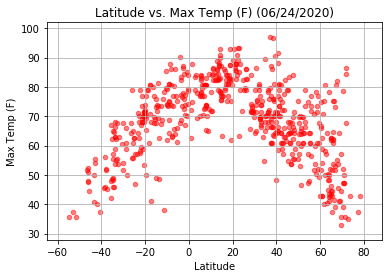

Correlation between Latitude and Maximum Temperature: 
The closer the city is to latitude 20, the higher the temperature


In [22]:
latitude=weather_df.loc[:,"Latitude"]
temperature=weather_df.loc[:,"Max Temp (F)"]
latitude_temperature=(pd.DataFrame({"Latitude":latitude,"Max Temp (F)":temperature}))
latitude_temperature.plot(kind="scatter",x="Latitude", y="Max Temp (F)", c="r", alpha=0.5)
plt.title(f"Latitude vs. Max Temp (F) ({clean_city_data['Date'][0]})")
plt.xlim(min(clean_city_data["Latitude"])-10,max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Max Temp (F)"])-5,max(clean_city_data["Max Temp (F)"])+5)
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()


print(f"Correlation between Latitude and Maximum Temperature: \nThe closer the city is to latitude 20, the higher the temperature")

## Latitude vs. Humidity Plot

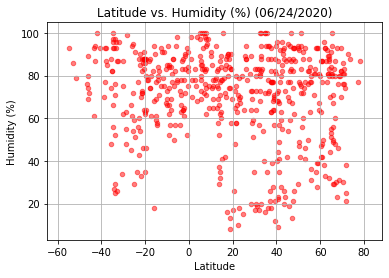

Correlation between Latitude and Humidity: 
There is no clear correlation between Latitude and Humidity


In [25]:
latitude=weather_df.loc[:,"Latitude"]
humidity=weather_df.loc[:,"Humidity (%)"]
latitude_humidity=(pd.DataFrame({"Latitude":latitude,"Humidity (%)":humidity}))
latitude_humidity.plot(kind="scatter",x="Latitude", y="Humidity (%)", c="r", alpha=0.5)
plt.title(f"Latitude vs. Humidity (%) ({clean_city_data['Date'][0]})")
plt.xlim(min(clean_city_data["Latitude"])-10,max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Humidity (%)"])-5,max(clean_city_data["Humidity (%)"])+5)
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

print("Correlation between Latitude and Humidity: \nThere is no clear correlation between Latitude and Humidity")

## Latitude vs. Cloudiness Plot

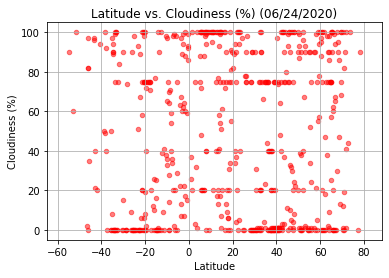

Correlation between Latitude and Cloudiness: 
There is no clear correlation between Latitude and Cloudiness


In [26]:
latitude=weather_df.loc[:,"Latitude"]
cloudiness=weather_df.loc[:,"Cloudiness (%)"]
latitude_cloudiness=(pd.DataFrame({"Latitude":latitude,"Cloudiness (%)":cloudiness}))
latitude_cloudiness.plot(kind="scatter",x="Latitude", y="Cloudiness (%)", c="r", alpha=0.5)
plt.title(f"Latitude vs. Cloudiness (%) ({clean_city_data['Date'][0]})")
plt.xlim(min(clean_city_data["Latitude"])-10,max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Cloudiness (%)"])-5,max(clean_city_data["Cloudiness (%)"])+5)
plt.grid()
plt.savefig("../output_data/Fig3.png")
plt.show()

print("Correlation between Latitude and Cloudiness: \nThere is no clear correlation between Latitude and Cloudiness")

## Latitude vs. Wind Speed Plot

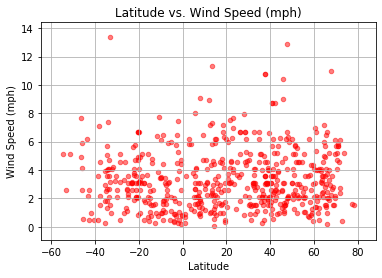

Correlation between Latitude and Wind Speed: 
There is no clear correlation between Latitude and Wind Speed.


In [29]:
atitude=weather_df.loc[:,"Latitude"]
wind=weather_df.loc[:,"Wind Speed (mph)"]
latitude_wind=(pd.DataFrame({"Latitude":latitude,"Wind Speed (mph)":wind}))
latitude_wind.plot(kind="scatter",x="Latitude", y="Wind Speed (mph)", c="r", alpha=0.5)
plt.title("Latitude vs. Wind Speed (mph)")
plt.xlim(min(clean_city_data["Latitude"])-10,max(clean_city_data["Latitude"])+10)
plt.ylim(min(clean_city_data["Wind Speed (mph)"])-1,max(clean_city_data["Wind Speed (mph)"])+1)
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

print("Correlation between Latitude and Wind Speed: \nThere is no clear correlation between Latitude and Wind Speed.")

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots
#create a dictionary
dic = {}
dic["latitude_temperature_northern"]=latitude_temperature[latitude_temperature["Latitude"]>=0]
dic["latitude_temperature_southern"]=latitude_temperature[latitude_temperature["Latitude"]<0]
dic["latitude_humidity_northern"]=latitude_humidity[latitude_humidity["Latitude"]>=0]
dic["latitude_humidity_southern"]=latitude_humidity[latitude_humidity["Latitude"]<0]
dic["latitude_cloudiness_northern"]=latitude_cloudiness[latitude_cloudiness["Latitude"]>=0]
dic["latitude_cloudiness_southern"]=latitude_cloudiness[latitude_cloudiness["Latitude"]<0]
dic["latitude_wind_northern"]=latitude_wind[latitude_wind["Latitude"]>=0]
dic["latitude_wind_southern"]=latitude_wind[latitude_wind["Latitude"]<0]

In [38]:
#function to create scatterplots and regression lines 
def scatter_plot(hemisphere,y_value,column):

    if hemisphere == "northern":
        original_df = dic[f"latitude_{y_value}_northern"]
        
        data_frame = original_df[original_df["Latitude"]>=0]
        data_frame.plot(kind="scatter",x="Latitude",y=column, c="blue", alpha=0.5)
        plt.title(f"Northern Hemisphere Latitude vs. {column}")
        
        x_values = original_df["Latitude"]
        y_values = original_df[column]
    
        (slope, intercept, rvalue, pvalue,stderr) = linregress(x_values,y_values)
    
        regress_value = x_values*slope+intercept
        line_eq = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))
        print(f"The Least Squares Regression Line is: {line_eq}")
        print(f"The correlation is {x_values.corr(y_values)}")
        print(f"The r-squared is: {rvalue**2}")
        plt.plot(x_values,regress_value,"r-")
        plt.annotate(line_eq,(min(x_values),min(y_values)), fontsize=14, color="red")
        
        plt.grid()
        plt.show()
        
    elif hemisphere == "southern":
        original_df = dic[f"latitude_{y_value}_southern"]
        
        data_frame = original_df[original_df["Latitude"]<0]
        data_frame.plot(kind="scatter",x="Latitude",y=column, c="blue", alpha=0.5)
        plt.title(f"Southern Hemisphere Latitude vs. {column}")
        
        x_values = original_df["Latitude"]
        y_values = original_df[column]
    
        (slope, intercept, rvalue, pvalue,stderr) = linregress(x_values,y_values)
    
        regress_value = x_values*slope+intercept
        line_eq = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))
        print(f"The Least Squares Regression Line is: {line_eq}")
        print(f"The correlation is {x_values.corr(y_values)}")
        print(f"The r-squared is: {rvalue**2}")
        plt.plot(x_values,regress_value,"r-")
        plt.annotate(line_eq,(min(x_values),min(y_values)), fontsize=14, color="red")
        
        plt.grid()
        plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Least Squares Regression Line is: y=-0.46x+87.26
The correlation is -0.6893043732304154
The r-squared is: 0.47514051895457593


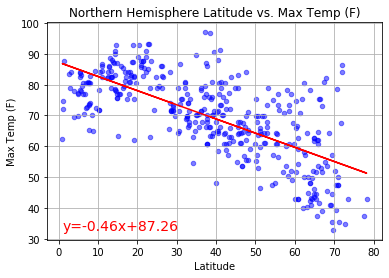

In [39]:
scatter_plot("northern","temperature","Max Temp (F)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Least Squares Regression Line is: y=0.71x+80.14
The correlation is 0.7522527208364065
The r-squared is: 0.5658841560057764


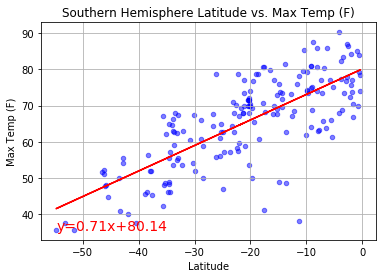

In [40]:
scatter_plot("southern","temperature","Max Temp (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


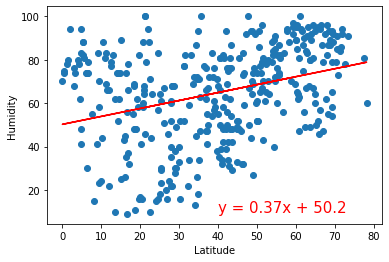

In [18]:
scatter_plot("northern","humidity","Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Least Squares Regression Line is: y=-0.04x+73.16
The correlation is -0.033040790675957936
The r-squared is: 0.001091693848492469


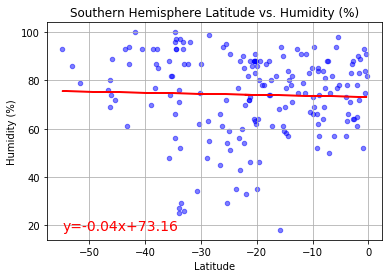

In [41]:
scatter_plot("southern","humidity","Humidity (%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Least Squares Regression Line is: y=-0.17x+55.97
The correlation is -0.08603175756773504
The r-squared is: 0.007401463310193535


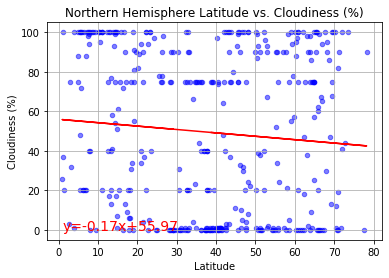

In [42]:
scatter_plot("northern","cloudiness","Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Least Squares Regression Line is: y=0.03x+44.77
The correlation is 0.009778188866295523
The r-squared is: 9.56129775049457e-05


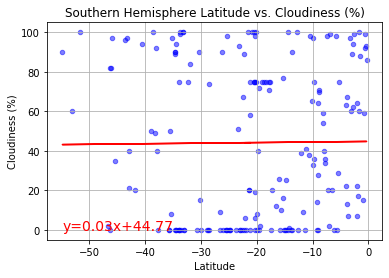

In [43]:
scatter_plot("southern","cloudiness","Cloudiness (%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Least Squares Regression Line is: y=0.0x+3.35
The correlation is 0.0212267055278495
The r-squared is: 0.0004505730275660365


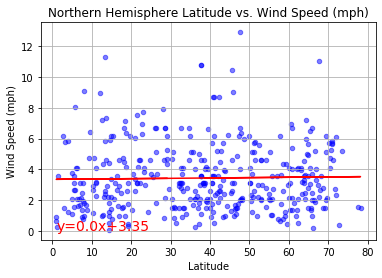

In [44]:
scatter_plot("northern","wind","Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Least Squares Regression Line is: y=-0.03x+2.55
The correlation is -0.16576274716340125
The r-squared is: 0.0274772883471577


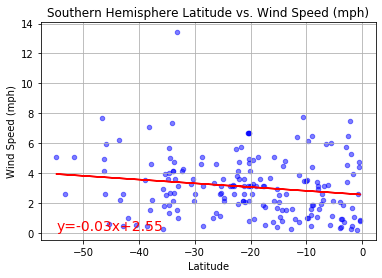

In [45]:
scatter_plot("southern","wind","Wind Speed (mph)")